In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [2]:
# Read the City and Ride Data
ride_data = pd.read_csv(ride_data_to_load)
city_data = pd.read_csv(city_data_to_load)

In [3]:
# Combine the data into a single dataset
grouped_ride_count = ride_data.groupby(['city']).count()

In [4]:
grouped_ride = ride_data.groupby(['city'])
grouped_ride_average = pd.DataFrame(grouped_ride['fare'].mean())

In [5]:
merged_data = pd.merge(city_data, grouped_ride_average, on='city')

In [6]:
# Display the data table for preview

final_merge = pd.merge(merged_data, grouped_ride_count, on='city')
final_merge = final_merge.rename(columns = {'city' : 'City', 'driver_count': 'Driver Count', 'type': 'Type', 'fare_x' : 'Average Fare', 'date' : 'Total Rides'})
pyber_df = final_merge.loc[:, ['City', 'Driver Count', 'Type', 'Average Fare', 'Total Rides']]
pyber_df["Total Fares"] = pyber_df["Average Fare"]*pyber_df["Total Rides"]
pyber_df.head()

,City,Driver Count,Type,Average Fare,Total Rides,Total Fares
0,Richardfort,38,Urban,22.373214,28,626.45
1,Williamsstad,59,Urban,24.362174,23,560.33
2,Port Angela,67,Urban,23.836842,19,452.90
3,Rodneyfort,34,Urban,28.616957,23,658.19
4,West Robert,39,Urban,25.123871,31,778.84


## Bubble Plot of Ride Sharing Data

In [7]:
urban_data = pyber_df.loc[pyber_df["Type"] == "Urban"]
suburban_data = pyber_df.loc[pyber_df["Type"] == "Suburban"]
rural_data = pyber_df.loc[pyber_df["Type"] == "Rural"]

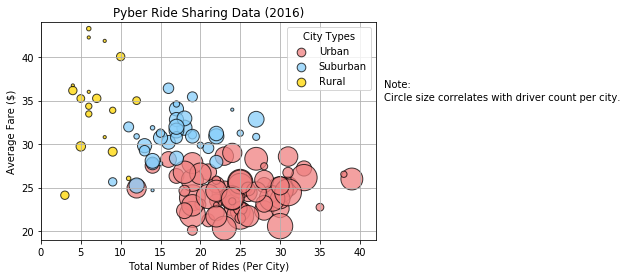

In [8]:
# Obtain the x and y coordinates for each of the three city types

urban_x_axis = urban_data["Total Rides"]
urban_y_axis = urban_data["Average Fare"]

# Build the scatter plots for each city types

plt.scatter(urban_x_axis, urban_y_axis, marker= "o", facecolors = "lightcoral", edgecolors = "black", alpha = .75, s=urban_data["Driver Count"]*10, label ="Urban")

suburban_x_axis = suburban_data["Total Rides"]
suburban_y_axis = suburban_data["Average Fare"]

plt.scatter(suburban_x_axis, suburban_y_axis, marker="o", facecolors = "lightskyblue", edgecolors = "black", alpha = .75, s=suburban_data["Driver Count"]*10, label = "Suburban")

rural_x_axis = rural_data["Total Rides"]
rural_y_axis = rural_data["Average Fare"]

plt.scatter(rural_x_axis, rural_y_axis, marker = "o", facecolors = "gold", edgecolors = "black", alpha = .75, s=rural_data["Driver Count"]*10, label = "Rural")

# Incorporate the other graph properties

plt.ylim(19,44)
plt.xlim(0,42)
plt.grid()

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend

legend = plt.legend(loc="best", title = "City Types")

#resize legend

legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]

# Incorporate a text label regarding circle size
plt.text(43,36.5,"Note:")
plt.text(43,35,"Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("Images/Bubble_Plot.png")
plt.show()


## Total Fares by City Type

In [10]:
# Calculate Type Percents

total_fares = pyber_df["Total Fares"].sum()

urban_fares = urban_data["Total Fares"].sum()
suburban_fares=suburban_data["Total Fares"].sum()
rural_fares = rural_data["Total Fares"].sum()

urban_percentage = urban_fares/total_fares
suburban_percentage = suburban_fares/total_fares
rural_percentage = rural_fares/total_fares


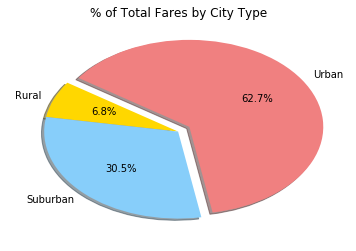

In [11]:
# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]

sizes = [urban_percentage, rural_percentage, suburban_percentage]

colors = ["lightcoral", "gold", "lightskyblue"]

explode = (.1, 0, 0)

plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle = 280)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/Total_Fares_By_City_Type.png")
plt.show()

## Total Rides by City Type

In [13]:
# Calculate Ride Percents
urban_total = urban_data["Total Rides"].sum()
suburban_total = suburban_data["Total Rides"].sum()
rural_total = rural_data["Total Rides"].sum()

total_rides = urban_total + suburban_total + rural_total

urban_percentage_rides = urban_total/total_rides
suburban_percentage_rides = suburban_total/total_rides
rural_percentage_rides = rural_total/total_rides

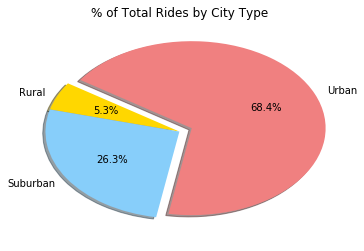

In [14]:
# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]

sizes = [urban_percentage_rides, rural_percentage_rides, suburban_percentage_rides]

colors = ["lightcoral", "gold", "lightskyblue"]

explode = (.1, 0, 0)

plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle = 260)

plt.title("% of Total Rides by City Type")

#Save Figure
plt.savefig("Images/Total_Rides_By_City_Type.png")
plt.show()

## Total Drivers by City Type

In [16]:
# Calculate Driver Percents

total_drivers = pyber_df["Driver Count"].sum()

urban_drivers = urban_data["Driver Count"].sum()
suburban_drivers = suburban_data["Driver Count"].sum()
rural_drivers = rural_data["Driver Count"].sum()

urban_driver_percentage = urban_drivers/total_drivers
suburban_driver_percentage = suburban_drivers/total_drivers
rural_driver_percentage = rural_drivers/total_drivers

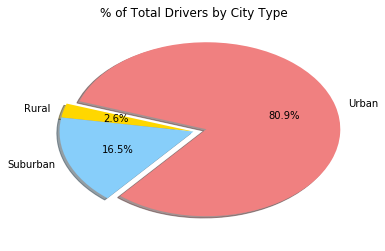

In [17]:
# Build Pie Charts

labels = ["Urban", "Rural", "Suburban"]

sizes = [urban_driver_percentage, rural_driver_percentage, suburban_driver_percentage]

colors = ["lightcoral", "gold", "lightskyblue"]

explode = (.1, 0, 0)

plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle = 230)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Images/Total_Drivers_By_City_Type.png")
plt.show()